<a href="https://colab.research.google.com/github/EvgenyMyzin/Python-for-Data-Science/blob/master/Unsupervised_learning_Lsn_8_Gr_ai_1054_Myzin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Тема “Обучение без учителя”

In [ ]:
### Задание 1
### Импортируйте библиотеки pandas, numpy и matplotlib.
### Загрузите "Boston House Prices dataset" из встроенных наборов
### данных библиотеки sklearn.
### Создайте датафреймы X и y из этих данных.
### Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
### с помощью функции train_test_split так, чтобы размер тестовой выборки
### составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
### Масштабируйте данные с помощью StandardScaler.
### Постройте модель TSNE на тренировочный данных с параметрами:
### n_components=2, learning_rate=250, random_state=42.
### Постройте диаграмму рассеяния на этих данных.

In [2]:
### Импортируйте библиотеки pandas, numpy и matplotlib.
import numpy as np
import pandas as pd 
### from sklearn.ensemble import RandomForestClassifier
### from sklearn.model_selection import GridSearchCV
### from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
### Загрузите "Boston House Prices dataset" из встроенных наборов
### данных библиотеки sklearn.
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
data = boston["data"]
data.shape

(506, 13)

In [8]:
feature_names = boston["feature_names"]
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
### Создайте датафреймы X и y из этих данных.
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [13]:
target = boston["target"]
target.shape

(506,)

In [14]:
y = pd.DataFrame(target, columns=["price"])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [16]:
### Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
### с помощью функции train_test_split так, чтобы размер тестовой выборки
### составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [69]:
### Масштабируйте данные с помощью StandardScaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [25]:
from sklearn.manifold import TSNE

In [40]:
### Постройте модель TSNE на тренировочный данных с параметрами:
### n_components=2, learning_rate=250, random_state=42.
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


In [33]:
### X_train_tsne

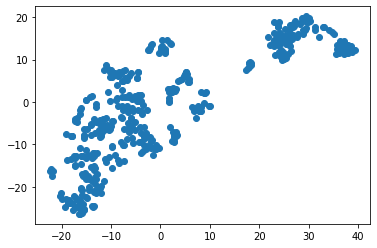

In [41]:
### Постройте диаграмму рассеяния на этих данных.
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

In [ ]:
### Задание 2
### С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
### используйте все признаки из датафрейма X_train.
### Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
### Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
### и раскрасьте точки из разных кластеров разными цветами.
### Вычислите средние значения price и CRIM в разных кластерах.

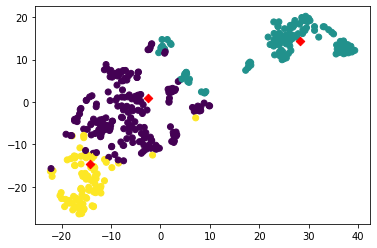

In [53]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.show()

In [63]:
print('Средние значения price:')
print((y_train[labels_train == 0].mean()))
print((y_train[labels_train == 1].mean()))
print((y_train[labels_train == 2].mean()))
print('Средние значения CRIM:')
print((X_train.loc[labels_train == 0, 'CRIM'].mean()))
print((X_train.loc[labels_train == 1, 'CRIM'].mean()))
print((X_train.loc[labels_train == 2, 'CRIM'].mean()))

Средние значения price:
price    24.958115
dtype: float64
price    16.165354
dtype: float64
price    27.788372
dtype: float64
Средние значения CRIM:
0.42166020942408367
10.797028425196853
0.07356558139534886


In [ ]:
### *Задание 3
### Примените модель KMeans, построенную в предыдущем задании,
### к данным из тестового набора.
### Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [64]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
print('До:\t{}'.format(X_test_scaled.shape))
print('После:\t{}'.format(X_test_tsne.shape))

До:	(102, 13)
После:	(102, 2)


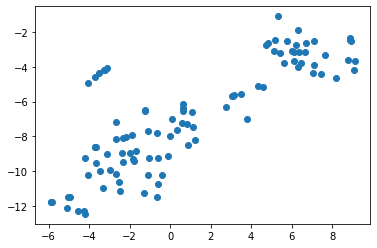

In [65]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1])
plt.show()

In [66]:
labels_test = kmeans.predict(X_test_scaled)

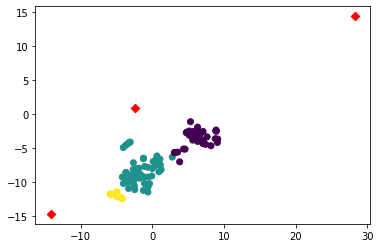

In [70]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_train)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.show()

In [71]:
print('Средние значения price:')
print((y_test[labels_train == 0].mean()))
print((y_test[labels_train == 1].mean()))
print((y_test[labels_train == 2].mean()))
print('Средние значения CRIM:')
print((X_test.loc[labels_train == 0, 'CRIM'].mean()))
print((X_test.loc[labels_train == 1, 'CRIM'].mean()))
print((X_test.loc[labels_train == 2, 'CRIM'].mean()))

Средние значения price:
price    16.710526
dtype: float64
price    22.690909
dtype: float64
price    34.311111
dtype: float64
Средние значения CRIM:
9.419181842105264
0.21929690909090907
0.04070333333333334
